In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data_model_preprocessing-PBA.csv")
df.head()

,WeekendOrder,Processing.Days,Distance_km,`Order Item Product Price`,`Order Item Quantity`,`Order Item Discount Rate`,`Order Region`Caribbean,`Order Region`Central Africa,`Order Region`Central America,`Order Region`East Africa,`Order Region`East of USA,`Order Region`Eastern Asia,`Order Region`Eastern Europe,`Order Region`North Africa,`Order Region`Northern Europe,`Order Region`Oceania,`Order Region`South America,`Order Region`South Asia,`Order Region`South of USA,`Order Region`Southeast Asia,`Order Region`Southern Africa,`Order Region`Southern Europe,`Order Region`US Center,`Order Region`West Africa,`Order Region`West Asia,`Order Region`West of USA,`Order Region`Western Europe,`Shipping Mode`Same Day,`Shipping Mode`Second Class,`Shipping Mode`Standard Class,Late_delivery_risk
0,0,3.0,18500.760815,327.75,1,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,3.0,11640.755465,327.75,1,0.07,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,16576.993966,327.75,1,0.09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,6.0,15192.036863,327.75,1,0.10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2.0,15431.281031,327.75,1,0.12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [3]:
df.columns

Index(['WeekendOrder', 'Processing.Days', 'Distance_km',
       '`Order Item Product Price`', '`Order Item Quantity`',
       '`Order Item Discount Rate`', '`Order Region`Caribbean',
       '`Order Region`Central Africa', '`Order Region`Central America',
       '`Order Region`East Africa', '`Order Region`East of USA',
       '`Order Region`Eastern Asia', '`Order Region`Eastern Europe',
       '`Order Region`North Africa', '`Order Region`Northern Europe',
       '`Order Region`Oceania', '`Order Region`South America',
       '`Order Region`South Asia', '`Order Region`South of  USA',
       '`Order Region`Southeast Asia', '`Order Region`Southern Africa',
       '`Order Region`Southern Europe', '`Order Region`US Center',
       '`Order Region`West Africa', '`Order Region`West Asia',
       '`Order Region`West of USA', '`Order Region`Western Europe',
       '`Shipping Mode`Same Day', '`Shipping Mode`Second Class',
       '`Shipping Mode`Standard Class', 'Late_delivery_risk'],
      dtype='o

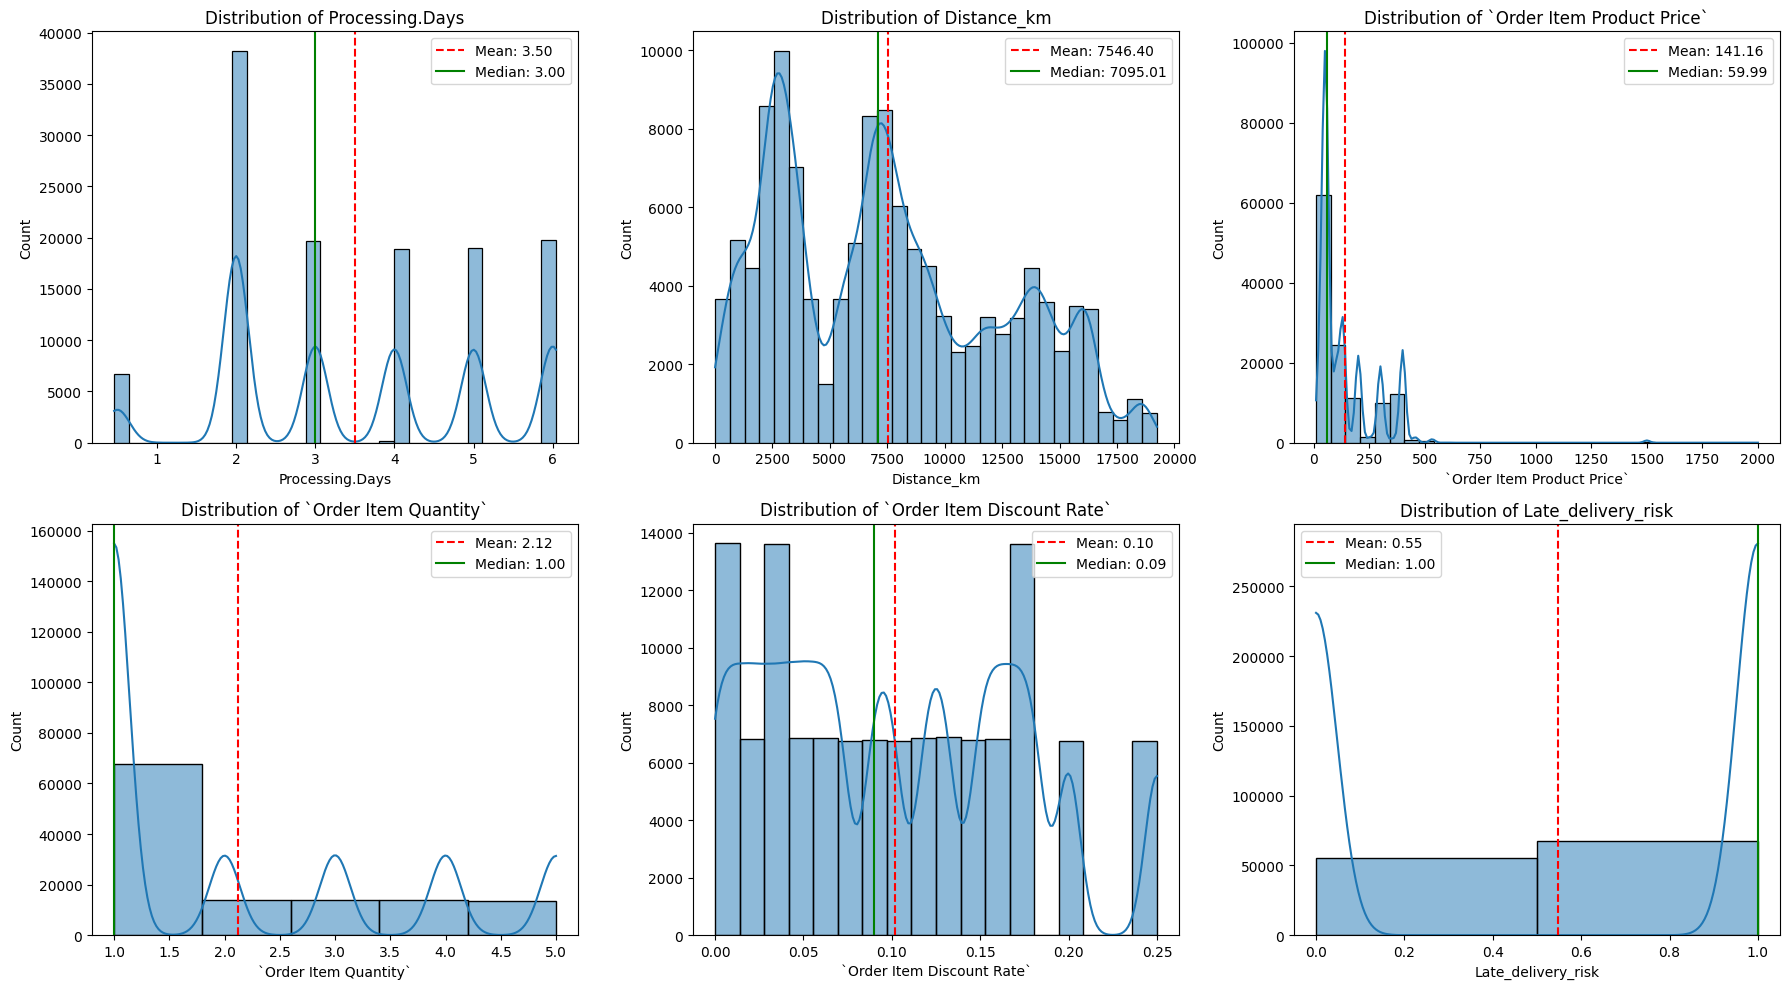

In [4]:
plot_cols = ('Processing.Days', 'Distance_km', '`Order Item Product Price`', '`Order Item Quantity`', '`Order Item Discount Rate`', 'Late_delivery_risk')
# plot_cols = df.select_dtypes(include='number').columns.tolist()

n = len(plot_cols)
cols = 3
row = int(np.ceil(n/cols))

plt.figure(figsize=(18, 5*row))

for i, col in enumerate(plot_cols, 1):
    ax = plt.subplot(row, cols, i)
    
    unique_vals = df[col].nunique()
    
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=unique_vals if unique_vals < 30 else 30)
    
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    ax.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f}')
    ax.set_title(f'Distribution of {col}')
    ax.legend()

plt.tight_layout()
plt.show()

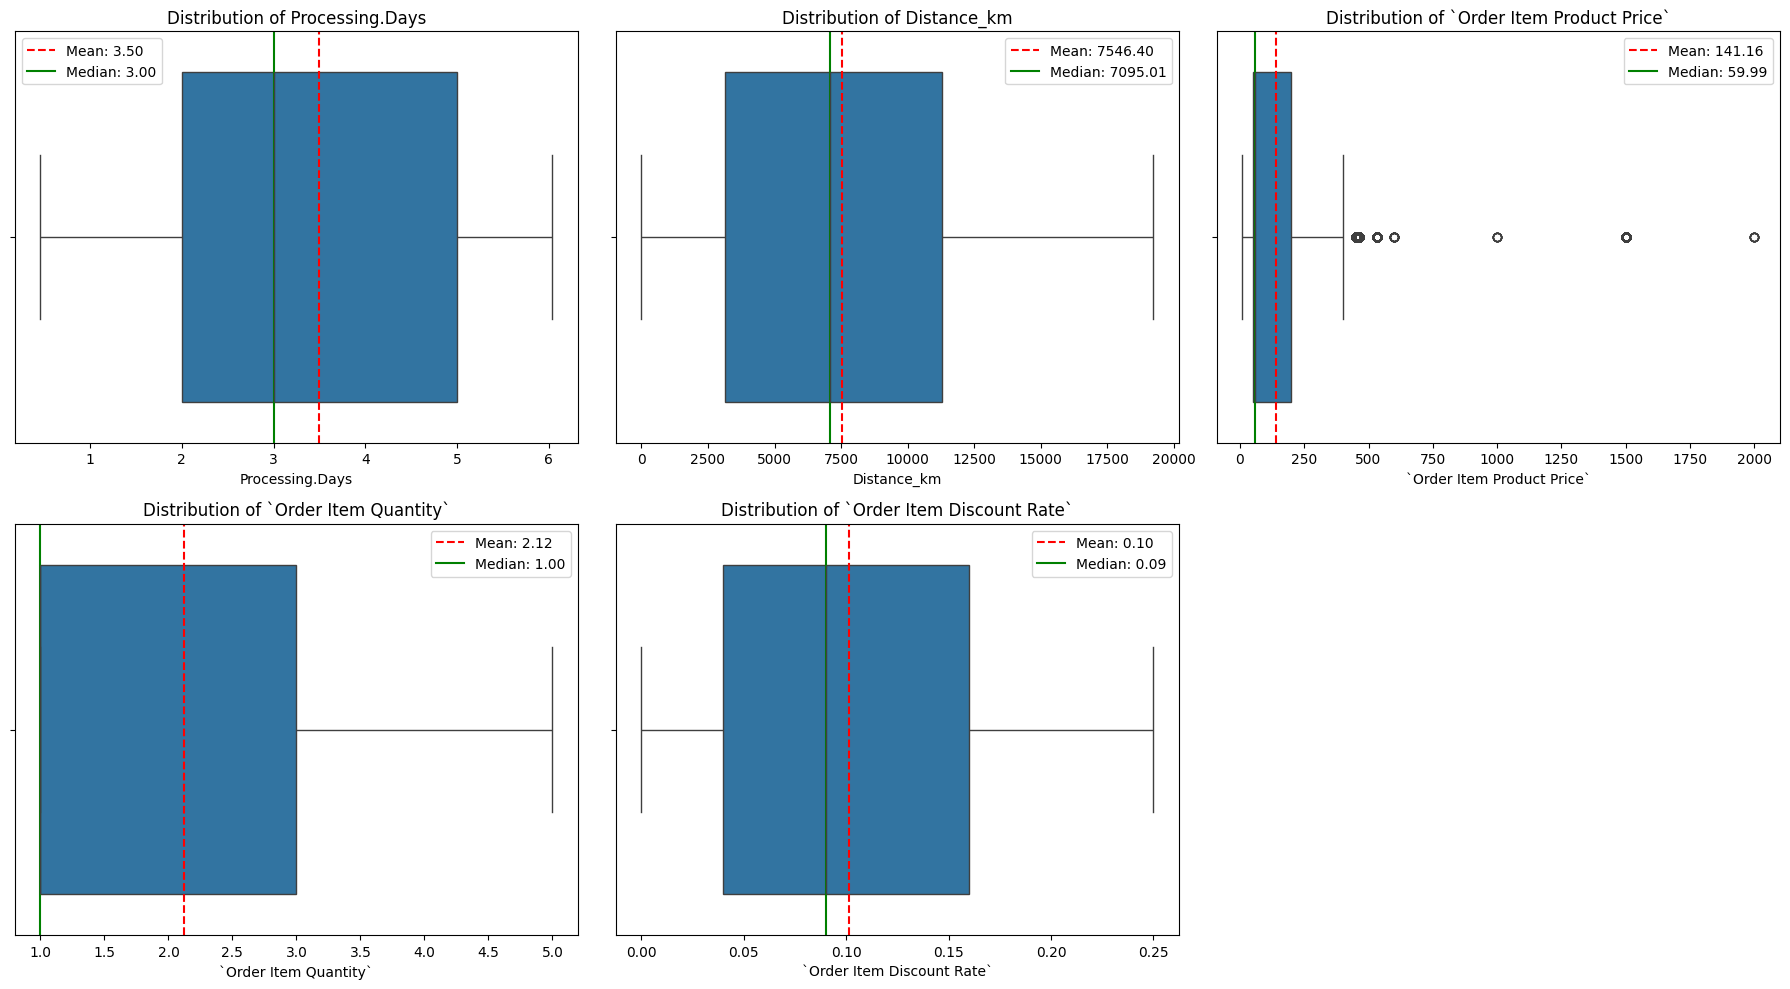

In [5]:
plot_cols = ('Processing.Days', 'Distance_km', '`Order Item Product Price`', '`Order Item Quantity`', '`Order Item Discount Rate`')
# plot_cols = df.select_dtypes(include='number').columns.tolist()

n = len(plot_cols)
cols = 3
row = int(np.ceil(n/cols))

plt.figure(figsize=(18, 5*row))

for i, col in enumerate(plot_cols, 1):
    ax = plt.subplot(row, cols, i)
    
    unique_vals = df[col].nunique()
    
    sns.boxplot(data=df, x=col, ax=ax)
    
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    ax.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f}')
    ax.set_title(f'Distribution of {col}')
    ax.legend()

plt.tight_layout()
plt.show()

In [6]:
X = df.drop(columns=['Late_delivery_risk'])
y = df['Late_delivery_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
scale_columns = ['Processing.Days', 'Distance_km', '`Order Item Product Price`', '`Order Item Quantity`', '`Order Item Discount Rate`']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

processor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), scale_columns)
    ],    remainder='passthrough'
)

model = MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        alpha=0.01,
        learning_rate_init=0.01,
        solver='sgd',
        batch_size=512,
        random_state=42,
        max_iter=800,
        early_stopping=True,
        n_iter_no_change=30,
        learning_rate='adaptive',
        shuffle=True,
        validation_fraction=0.15
    )

pipe_mlp = Pipeline([
    ('processor', processor),
    ('mlp', model)
])

cv_results_mlp = cross_validate(
    pipe_mlp, 
    X_train, 
    y_train, 
    cv=cv, 
    scoring=['roc_auc','f1','accuracy', 'recall', 'precision'],
    n_jobs=-1,
    return_train_score=True
)

Cross-validation results:
Mean Train ROC AUC: 0.9775 ± 0.0025
Mean Test ROC AUC: 0.9744 ± 0.0014
Mean Train F1 Score: 0.9580 ± 0.0010
Mean Test F1 Score: 0.9563 ± 0.0012
Mean Train Accuracy: 0.9533 ± 0.0010
Mean Test Accuracy: 0.9513 ± 0.0017
Mean Train Recall: 0.9713 ± 0.0104
Mean Test Recall: 0.9697 ± 0.0090
Mean Train Precision: 0.9453 ± 0.0088
Mean Test Precision: 0.9434 ± 0.0099


/var/folders/3d/5m5wts_16hx2_57vmkyjpvf00000gn/T/ipykernel_52877/4055792889.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


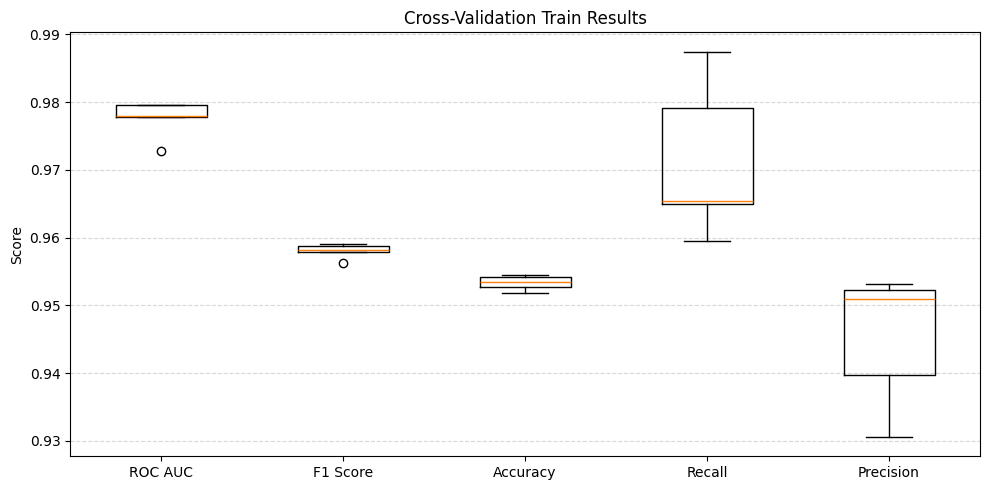

/var/folders/3d/5m5wts_16hx2_57vmkyjpvf00000gn/T/ipykernel_52877/4055792889.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


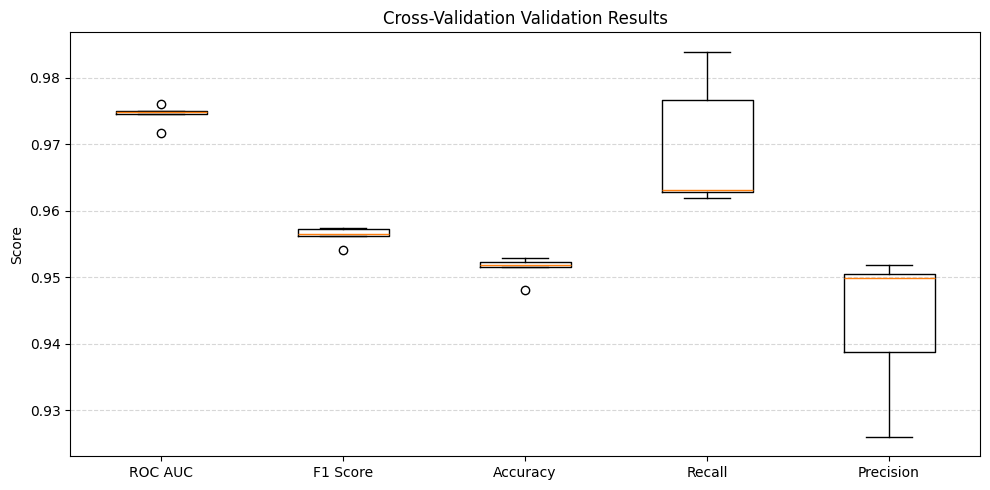

In [9]:
# Cross-val train results
print("Cross-validation results:")
print(f"Mean Train ROC AUC: {cv_results_mlp['train_roc_auc'].mean():.4f} ± {cv_results_mlp['train_roc_auc'].std():.4f}")
print(f"Mean Test ROC AUC: {cv_results_mlp['test_roc_auc'].mean():.4f} ± {cv_results_mlp['test_roc_auc'].std():.4f}")
print(f"Mean Train F1 Score: {cv_results_mlp['train_f1'].mean():.4f} ± {cv_results_mlp['train_f1'].std():.4f}")
print(f"Mean Test F1 Score: {cv_results_mlp['test_f1'].mean():.4f} ± {cv_results_mlp['test_f1'].std():.4f}")
print(f"Mean Train Accuracy: {cv_results_mlp['train_accuracy'].mean():.4f} ± {cv_results_mlp['train_accuracy'].std():.4f}")
print(f"Mean Test Accuracy: {cv_results_mlp['test_accuracy'].mean():.4f} ± {cv_results_mlp['test_accuracy'].std():.4f}")
print(f"Mean Train Recall: {cv_results_mlp['train_recall'].mean():.4f} ± {cv_results_mlp['train_recall'].std():.4f}")
print(f"Mean Test Recall: {cv_results_mlp['test_recall'].mean():.4f} ± {cv_results_mlp['test_recall'].std():.4f}")
print(f"Mean Train Precision: {cv_results_mlp['train_precision'].mean():.4f} ± {cv_results_mlp['train_precision'].std():.4f}")
print(f"Mean Test Precision: {cv_results_mlp['test_precision'].mean():.4f} ± {cv_results_mlp['test_precision'].std():.4f}")

plt.figure(figsize=(10, 5))
plt.boxplot(
    [cv_results_mlp['train_roc_auc'], cv_results_mlp['train_f1'], cv_results_mlp['train_accuracy'], cv_results_mlp['train_recall'], cv_results_mlp['train_precision']],
    labels=['ROC AUC', 'F1 Score', 'Accuracy', 'Recall', 'Precision']
    )
plt.title('Cross-Validation Train Results')
plt.ylabel('Score')
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(
    [cv_results_mlp['test_roc_auc'], cv_results_mlp['test_f1'], cv_results_mlp['test_accuracy'], cv_results_mlp['test_recall'], cv_results_mlp['test_precision']],
    labels=['ROC AUC', 'F1 Score', 'Accuracy', 'Recall', 'Precision']
    )
plt.title('Cross-Validation Validation Results')
plt.ylabel('Score')
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Test Set Performance:
Accuracy:  0.9513299608355091
F1 Score:  0.9557935302182532
ROC AUC:  0.975192607404951
Recall:  0.9590273646638905
Precision:  0.9525814314203412


<Figure size 600x600 with 0 Axes>

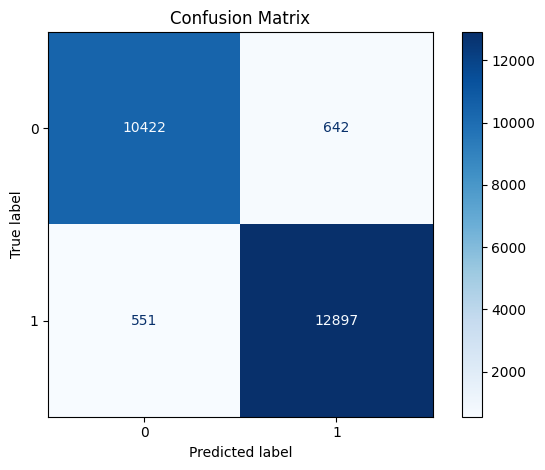

In [10]:
pipe_mlp.fit(X_train, y_train)

y_pred = pipe_mlp.predict(X_test)
y_proba = pipe_mlp.predict_proba(X_test)[:, 1]

print("Test Set Performance:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_proba))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

cm_mlp = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=pipe_mlp.classes_)
plt.figure(figsize=(6,6))
disp.plot(values_format='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

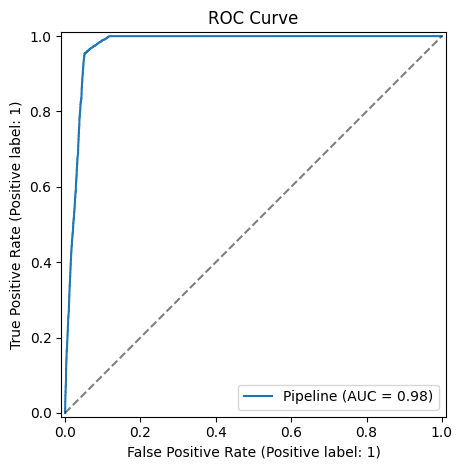

In [11]:
plt.figure(figsize=(6,6))
RocCurveDisplay.from_estimator(pipe_mlp, X_test, y_test)
plt.plot([0,1], [0,1], "k--", alpha=0.5)
plt.title('ROC Curve')
plt.tight_layout()
plt.show()

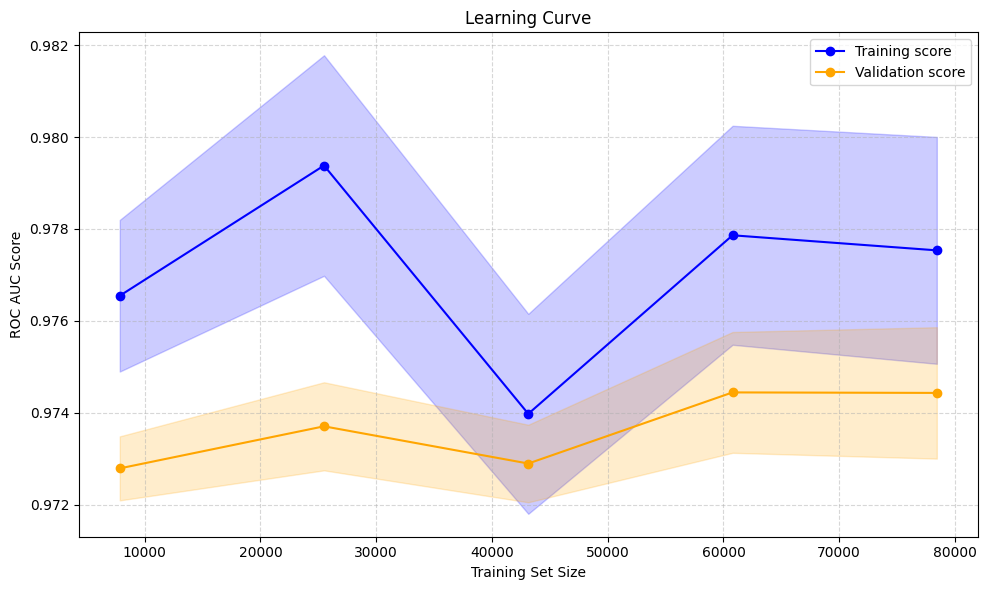

In [12]:
train_sizes, train_scores, val_scores = learning_curve(
    pipe_mlp,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='orange', label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('ROC AUC Score')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

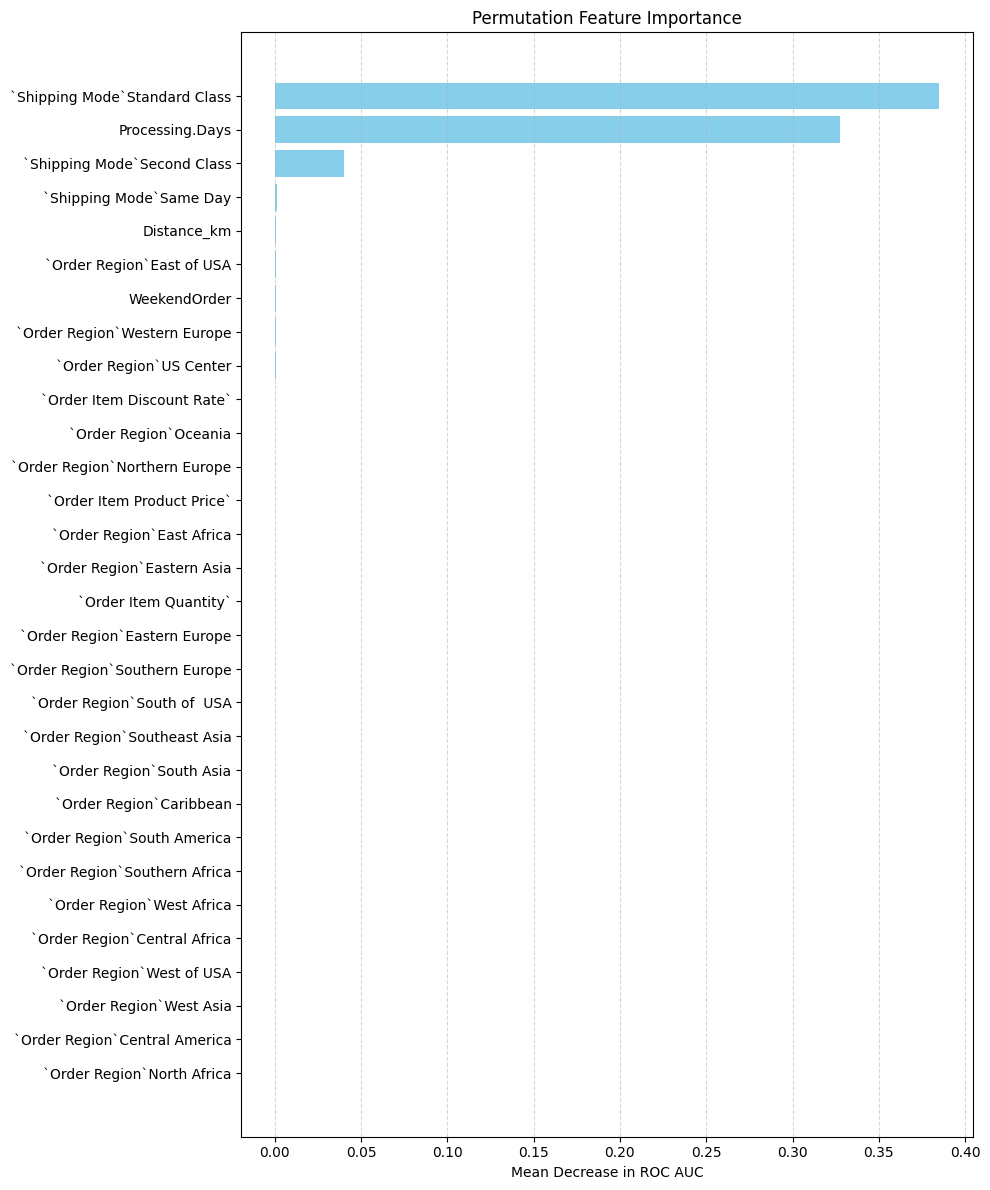

In [13]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    pipe_mlp, 
    X_test, 
    y_test, 
    n_repeats=10, 
    random_state=42, 
    n_jobs=-1,
    scoring='roc_auc'
)

perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_STD': result.importances_std
}).sort_values(by='Importance_Mean', ascending=False)

plt.figure(figsize=(10, max(6, 0.4 * len(perm_df))))
plt.barh(perm_df['Feature'], perm_df['Importance_Mean'], color='skyblue')
plt.xlabel('Mean Decrease in ROC AUC')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

<h1>Base Model: Logistics Regression</h1>

In [14]:
scale_columns = ['Processing.Days', 'Distance_km', '`Order Item Product Price`', '`Order Item Quantity`', '`Order Item Discount Rate`']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

processor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), scale_columns)
    ],    remainder='passthrough'
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='liblinear',
    random_state=42,
    max_iter=1000
)

pipe_lr = Pipeline([
    ('processor', processor),
    ('logistic_regression', lr_model)
])

cv_results_lr = cross_validate(
    pipe_lr, 
    X_train, 
    y_train, 
    cv=cv, 
    scoring=['roc_auc','f1','accuracy', 'recall', 'precision'],
    n_jobs=-1,
    return_train_score=True
)

Cross-validation results:
Mean Train ROC AUC: 0.9726 ± 0.0002
Mean Test ROC AUC: 0.9724 ± 0.0009
Mean Train F1 Score: 0.9563 ± 0.0003
Mean Test F1 Score: 0.9563 ± 0.0013
Mean Train Accuracy: 0.9520 ± 0.0003
Mean Test Accuracy: 0.9520 ± 0.0014
Mean Train Recall: 0.9559 ± 0.0004
Mean Test Recall: 0.9559 ± 0.0024
Mean Train Precision: 0.9566 ± 0.0004
Mean Test Precision: 0.9566 ± 0.0011


/var/folders/3d/5m5wts_16hx2_57vmkyjpvf00000gn/T/ipykernel_52877/689787722.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


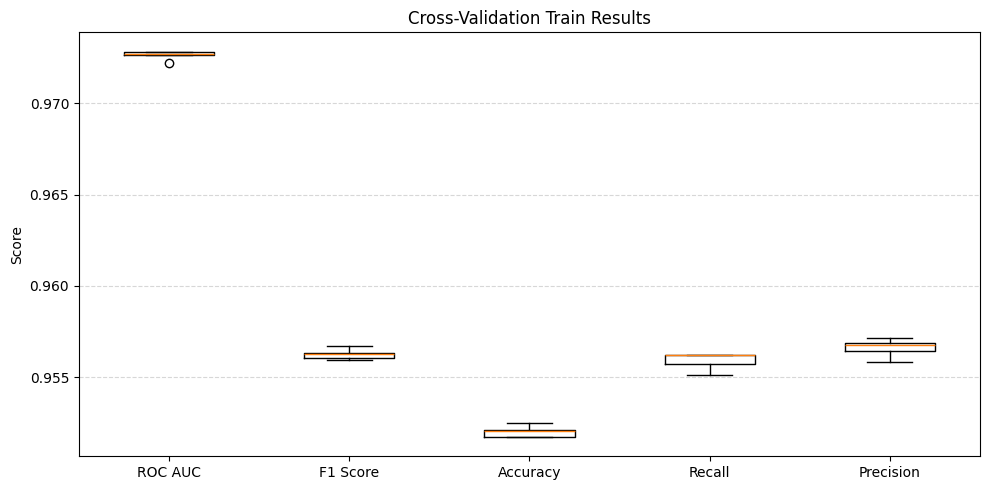

/var/folders/3d/5m5wts_16hx2_57vmkyjpvf00000gn/T/ipykernel_52877/689787722.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


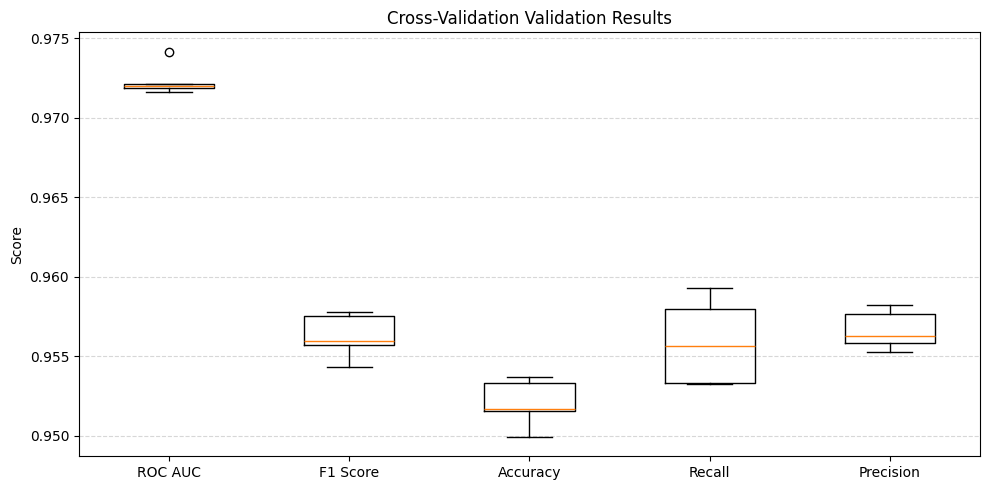

In [15]:
# Cross-val train results
print("Cross-validation results:")
print(f"Mean Train ROC AUC: {cv_results_lr['train_roc_auc'].mean():.4f} ± {cv_results_lr['train_roc_auc'].std():.4f}")
print(f"Mean Test ROC AUC: {cv_results_lr['test_roc_auc'].mean():.4f} ± {cv_results_lr['test_roc_auc'].std():.4f}")
print(f"Mean Train F1 Score: {cv_results_lr['train_f1'].mean():.4f} ± {cv_results_lr['train_f1'].std():.4f}")
print(f"Mean Test F1 Score: {cv_results_lr['test_f1'].mean():.4f} ± {cv_results_lr['test_f1'].std():.4f}")
print(f"Mean Train Accuracy: {cv_results_lr['train_accuracy'].mean():.4f} ± {cv_results_lr['train_accuracy'].std():.4f}")
print(f"Mean Test Accuracy: {cv_results_lr['test_accuracy'].mean():.4f} ± {cv_results_lr['test_accuracy'].std():.4f}")
print(f"Mean Train Recall: {cv_results_lr['train_recall'].mean():.4f} ± {cv_results_lr['train_recall'].std():.4f}")
print(f"Mean Test Recall: {cv_results_lr['test_recall'].mean():.4f} ± {cv_results_lr['test_recall'].std():.4f}")
print(f"Mean Train Precision: {cv_results_lr['train_precision'].mean():.4f} ± {cv_results_lr['train_precision'].std():.4f}")
print(f"Mean Test Precision: {cv_results_lr['test_precision'].mean():.4f} ± {cv_results_lr['test_precision'].std():.4f}")

plt.figure(figsize=(10, 5))
plt.boxplot(
    [cv_results_lr['train_roc_auc'], cv_results_lr['train_f1'], cv_results_lr['train_accuracy'], cv_results_lr['train_recall'], cv_results_lr['train_precision']], 
    labels=['ROC AUC', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
plt.title('Cross-Validation Train Results')
plt.ylabel('Score')
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(
    [cv_results_lr['test_roc_auc'], cv_results_lr['test_f1'], cv_results_lr['test_accuracy'], cv_results_lr['test_recall'], cv_results_lr['test_precision']], 
    labels=['ROC AUC', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
plt.title('Cross-Validation Validation Results')
plt.ylabel('Score')
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Test Set Performance:
Accuracy:  0.9505956266318538
F1 Score:  0.9548925392036354
ROC AUC:  0.9727995892052856
Recall:  0.9531528851873885
Precision:  0.9566385551160534


<Figure size 600x600 with 0 Axes>

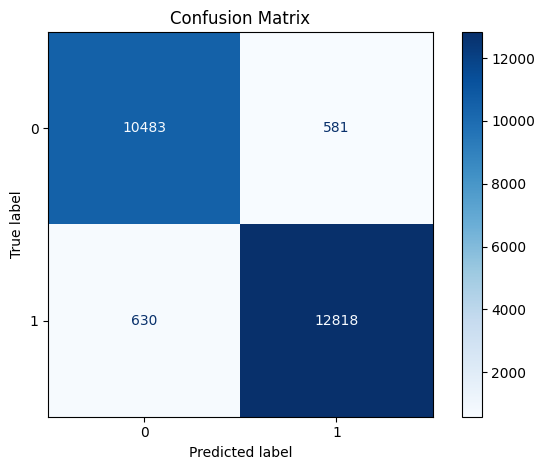

In [16]:
pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_test)
y_proba = pipe_lr.predict_proba(X_test)[:, 1]

print("Test Set Performance:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_proba))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

cm_lr = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=pipe_lr.classes_)
plt.figure(figsize=(6,6))
disp.plot(values_format='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

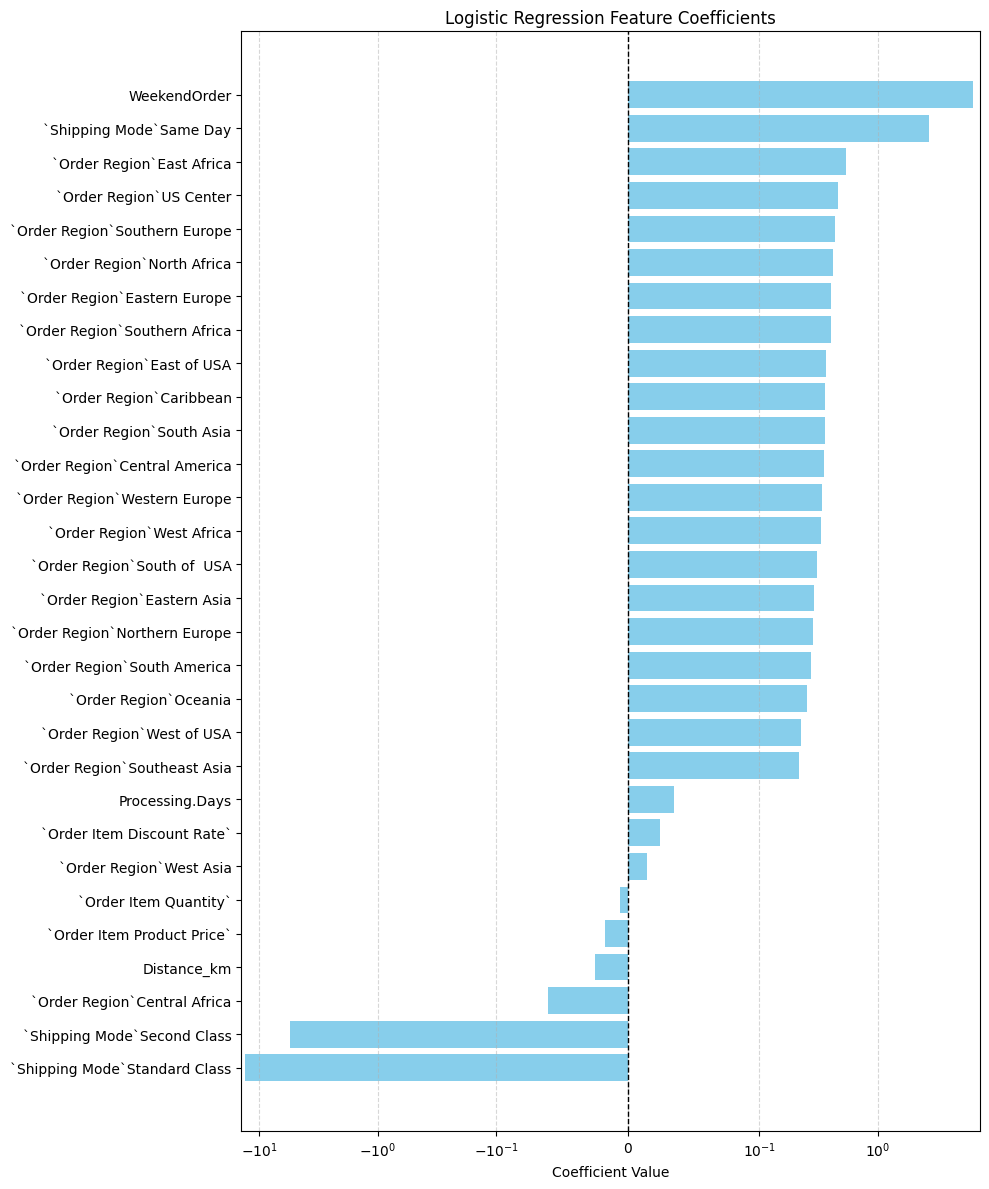

In [17]:
logreg = pipe_lr.named_steps['logistic_regression']

feature_names = X.columns
coefficients = logreg.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient')

plt.figure(figsize=(10, max(6, 0.4 * len(coef_df))))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.xscale('symlog', linthresh=0.1)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Coefficients')
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

<h1>Comparison</h1>

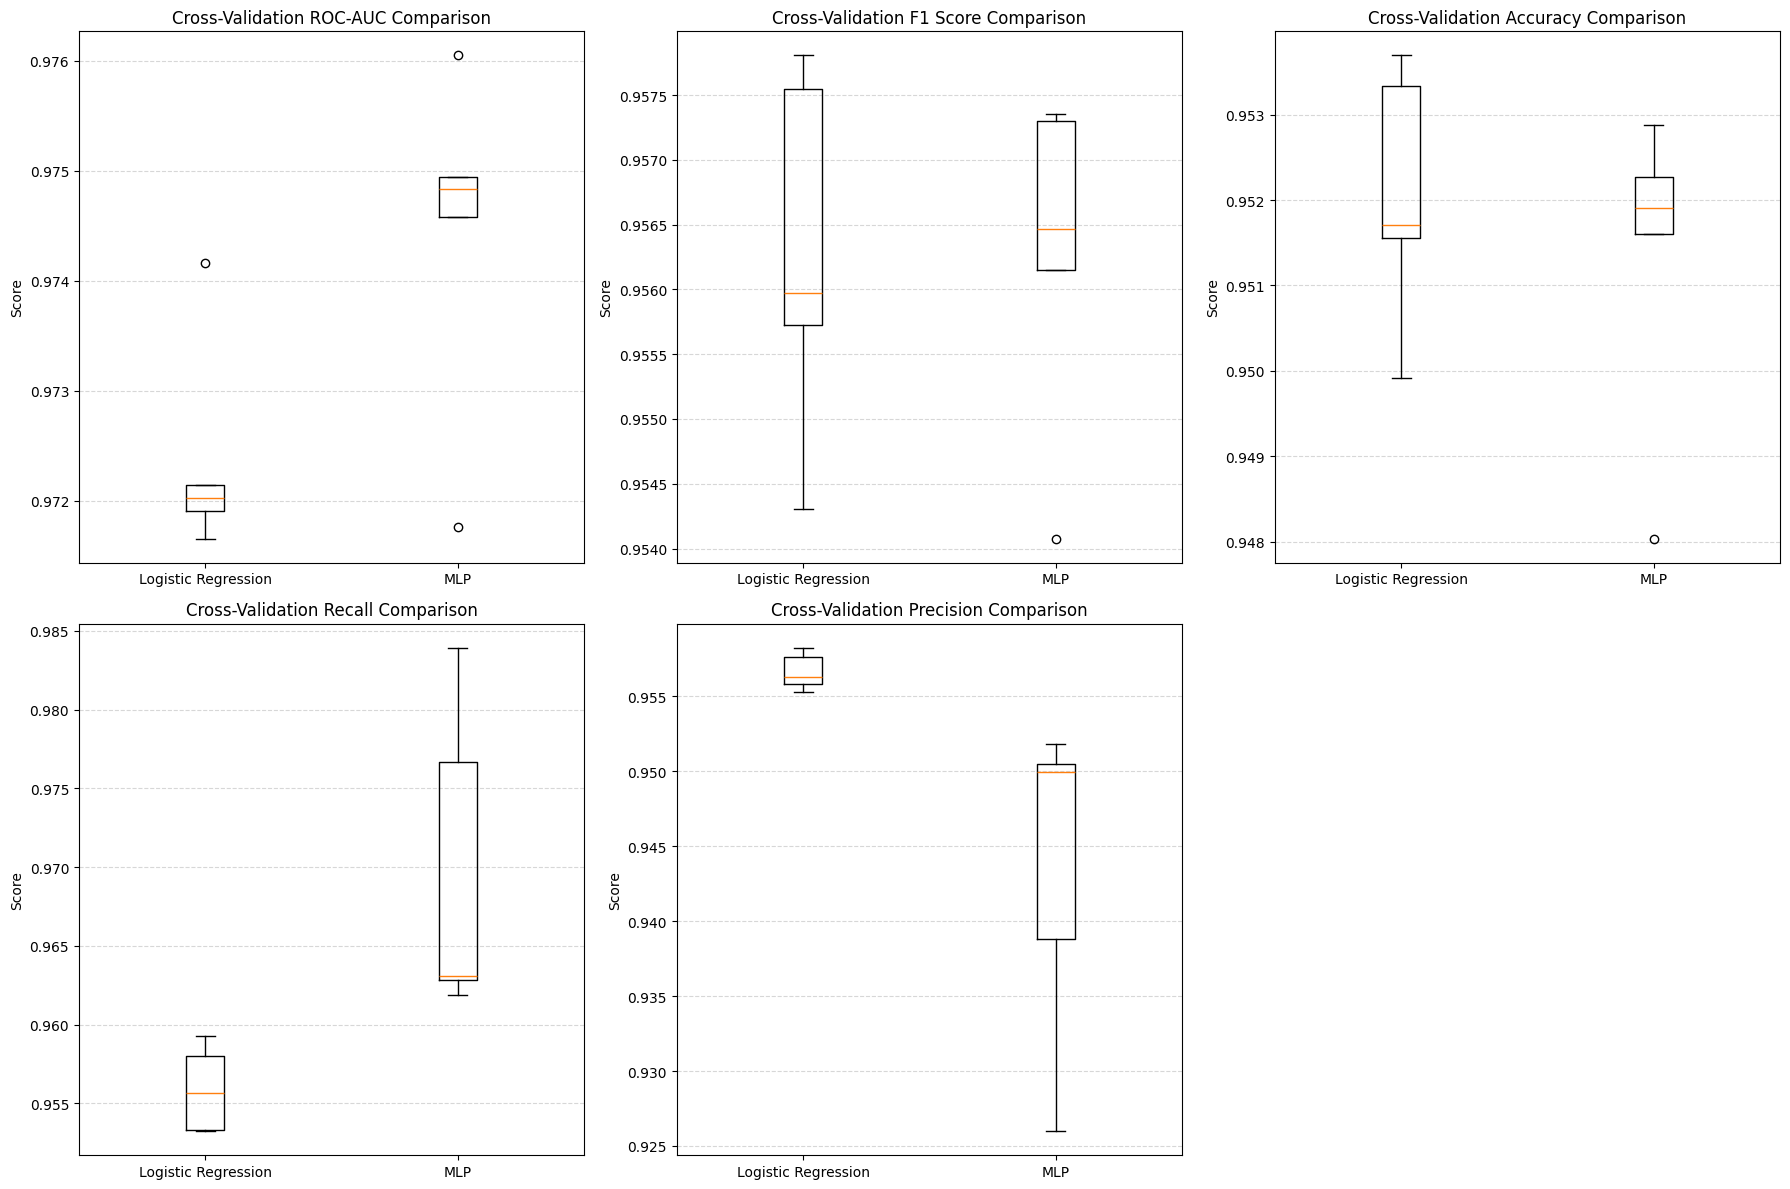

In [25]:
metrics = [
    ('test_roc_auc', 'ROC-AUC'), 
    ('test_f1', 'F1 Score'), 
    ('test_accuracy', 'Accuracy'),
    ('test_recall', 'Recall'),
    ('test_precision', 'Precision')
    ]

cv_scores = {"LogReg": cv_results_lr, "MLP": cv_results_mlp}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for ax, (metric, title) in zip(axes.flatten(), metrics):
    data = [cv_scores["LogReg"][metric], cv_scores["MLP"][metric]]
    ax.boxplot(data, tick_labels=['Logistic Regression', 'MLP'])
    ax.set_title(f'Cross-Validation {title} Comparison')
    ax.set_ylabel('Score')
    ax.grid(axis="y", linestyle="--", alpha=0.5)

fig.delaxes(axes.flatten()[-1])  # Remove unused subplot
plt.tight_layout()
plt.show()

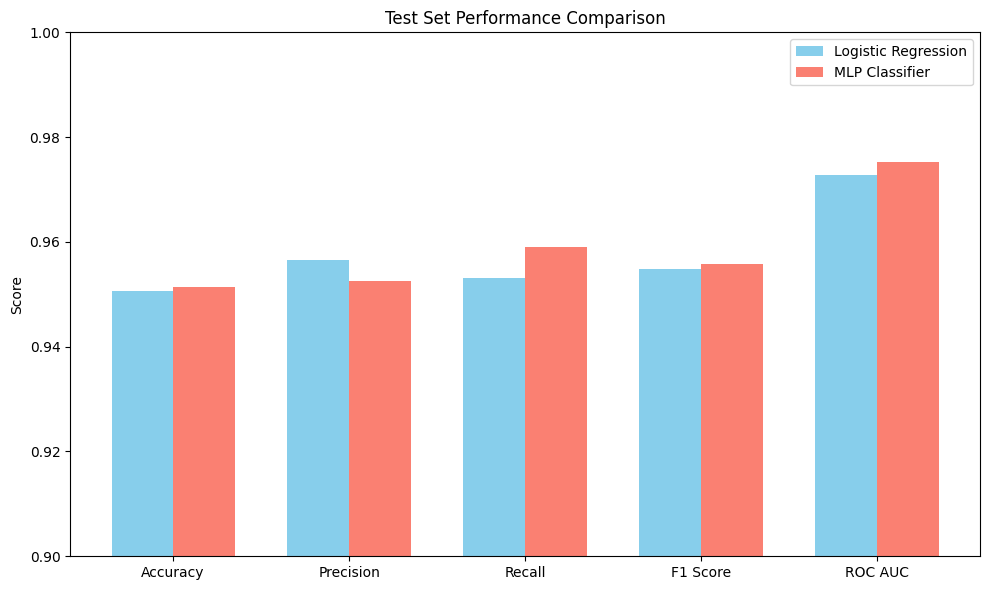

In [3]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]

mlp_scores = [
    0.9513299608355091,
    0.9525814314203412,
    0.9590273646638905,
    0.9557935302182532,
    0.975192607404951
]

logistic_scores = [
    0.9505956266318538,
    0.9566385551160534,
    0.9531528851873885,
    0.9548925392036354,
    0.9727995892052856
]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, logistic_scores, width, label='Logistic Regression', color='skyblue')
plt.bar(x + width/2, mlp_scores, width, label='MLP Classifier', color='salmon')

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.ylim(0.9, 1.0)
plt.title('Test Set Performance Comparison')
plt.legend()

plt.tight_layout()
plt.show()

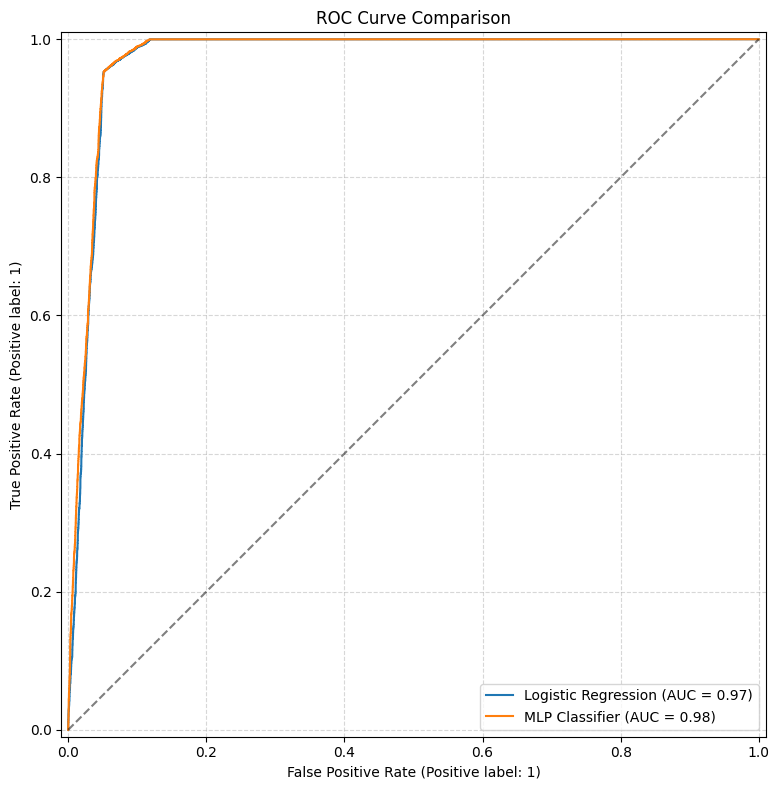

In [19]:
# plt.figure(figsize=(8,8))

models = {'Logistic Regression': pipe_lr,
          'MLP Classifier': pipe_mlp}

fig, ax = plt.subplots(figsize=(8,8))

for name, model in models.items():
    model.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=ax)

ax.plot([0,1], [0,1], "k--", alpha=0.5)
ax.set_title('ROC Curve Comparison')
ax.grid(True, linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()